# 0. Data Collection

#### Import modules and read in data:

- utilization of numpy and pandas to read and analyse the data
- utilization of matplotlib and seaborn to plot the data
- utilization of datetime framework to make the time data calculable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
bike_df = pd.read_csv('data/chicago_2018.csv')

# 1. Data Preparation

## 1.1 Feature Engineering

#### Feature Collection: 

To analyse and plot the temporal demand a transfer of the datatype of all time values/timestamps from string to datetime is required first to create calculable data. 
Based on this data change all required time units for the temporal plotting can be created by datetime module. 
We selected date, hour, weekday and month as the most significant features to display and plot the daily, monthly and seasonal fluctuation. 
To count the total number of trips during a defined period it is sufficient to use only the start or end time so the start time is used as plotting base in the following.

In [3]:
# change datatype from string to datetime
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

bike_df['date'] = bike_df['start_time'].dt.date
bike_df['hour'] = bike_df['start_time'].dt.hour
bike_df['weekday'] = bike_df['start_time'].dt.weekday
bike_df['month'] = bike_df['start_time'].dt.month
bike_df['duration'] = bike_df['end_time'] - bike_df['start_time']

## 1.2 Data Integrity

#### Data Cleaning to remove all potentially errorneous values: 

As described on the websites of the data providers errorneous values of system errors are not reduced from the dataset to ensure data integrity. First all values which seem to be not correct/errorneous should be removed from the considered dataset.
In the present case the temporal view implicate logical that every start time occurs before the end time. Otherwise the value needs to be removed from the dataset.
Moreover the data providers deleted all values from trips with lower than 1 minute ride duration, staff servicing and test trips. Based on this information other values are probably also test trips or errorneous values that are not removed, e.g. the trip duration is longer than 1 , but the trip is still a test trip with the same start and end station.

The consideration of the stations is based in the following on the ids and not the namens, because of the higher error rate of string versus numerical datatypes (integer)??

In [4]:
# how many entries are there, where start_time occurs later than end_time?
bike_df[bike_df['start_time'] > bike_df['end_time']].shape[0]

7

In [5]:
# only consider entries where start_time comes before end_time
bike_df = bike_df[bike_df['start_time'] < bike_df['end_time']]

In [6]:
# there are several very short rentals where start and end are identical --> possible erroneous rentals?!
filter1 = bike_df['start_station_id'] == bike_df['end_station_id']
filter2 = bike_df['duration'] < timedelta(seconds=120)

In [7]:
# number of those rentals
bike_df[np.logical_and(filter1, filter2)].shape[0]

7790

In [8]:
# remove those rows
# bike_df = bike_df[np.logical_not(np.logical_and(filter1, filter2))]

# 2. Descriptive Analysis

## 2.1 Total Temporal Demand and Seasonality

First the grouping of the temporal features is required to calculate the hourly, daily and monthly demand.

### Hourly demand:

In [9]:
# calculation of hourly demand
bike_hourly_demand = bike_df.groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand = pd.DataFrame(bike_hourly_demand)

#### pattern:  seaborn lineplot and boxplot

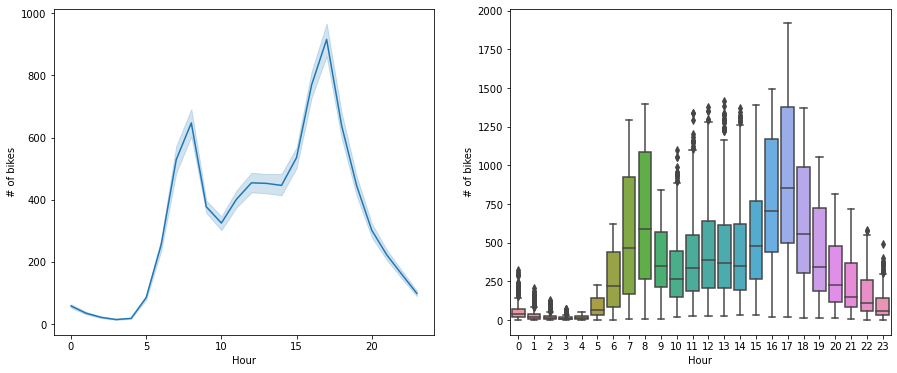

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_hourly_demand.index.get_level_values(1), y=bike_hourly_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_hourly_demand.index.get_level_values(1), y=bike_hourly_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Hour', ylabel='# of bikes')
ax[1].set(xlabel='Hour', ylabel='# of bikes')
plt.show()

#### Results: 

- The usage of the bikes starts in the early morning and ends in the evening  
- Two peaks are displayed: one in the morning at 8/9 am and one in the afternoon at 4/5 pm. This could be the case because many people use the bikes for the way to and from their work. 
- Moreover the number of trips increases again after 10 am so probably people also use the bike for ways during their freetime 
- The second peak exceeds the first one what is probably based on the sum of the usage of working people and people who use the bikes for freetime rides


### Daily demand:

In [11]:
# calculation of daily demand
bike_daily_demand = bike_df.groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand = pd.DataFrame(bike_daily_demand)

#### pattern: seaborn lineplot and boxplot

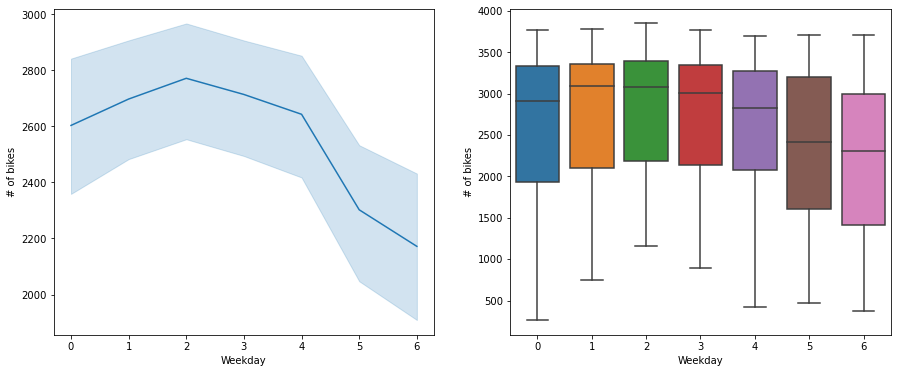

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_daily_demand.index.get_level_values(1), y=bike_daily_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_daily_demand.index.get_level_values(1), y=bike_daily_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Weekday', ylabel='# of bikes')
ax[1].set(xlabel='Weekday', ylabel='# of bikes')
plt.show()

#### Results:

- less usage at the weekend because of the trips to and from work are missing  
- peak on wednesday (maybe the weekday when the most people are working?)
- displays that the number of used bikes is probably heavily dependent on the number of working people  

Changes: description not as numbers but day names and start at 1 not at 0?

### Monthly demand:

In [13]:
# calculation of monthly demand
bike_monthly_demand = bike_df.groupby(['date', 'month'])['bike_id'].nunique()
bike_monthly_demand = pd.DataFrame(bike_monthly_demand)

#### pattern: seaborn lineplot and boxplot

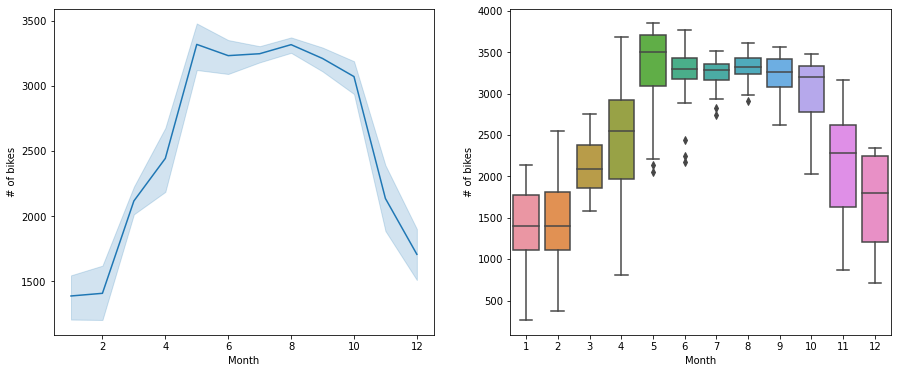

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_monthly_demand.index.get_level_values(1), y=bike_monthly_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_monthly_demand.index.get_level_values(1), y=bike_monthly_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Month', ylabel='# of bikes')
ax[1].set(xlabel='Month', ylabel='# of bikes')
plt.show()

#### Results:

- demand during the year is higher in summer than in winter
- demand depends on temperature/season
- peak in the warm months 
- almost no demand in winter

plot with temperature data to show the correlation between usage and season/temperature? 

## 2.2 Demand by usertype

Two different usertypes (Subscriber, Customer) are presented in the given dataset what opens the question whether the demand over day and year also differs between and depends on the usertypes. 

### Daily demand depending on the usertype:

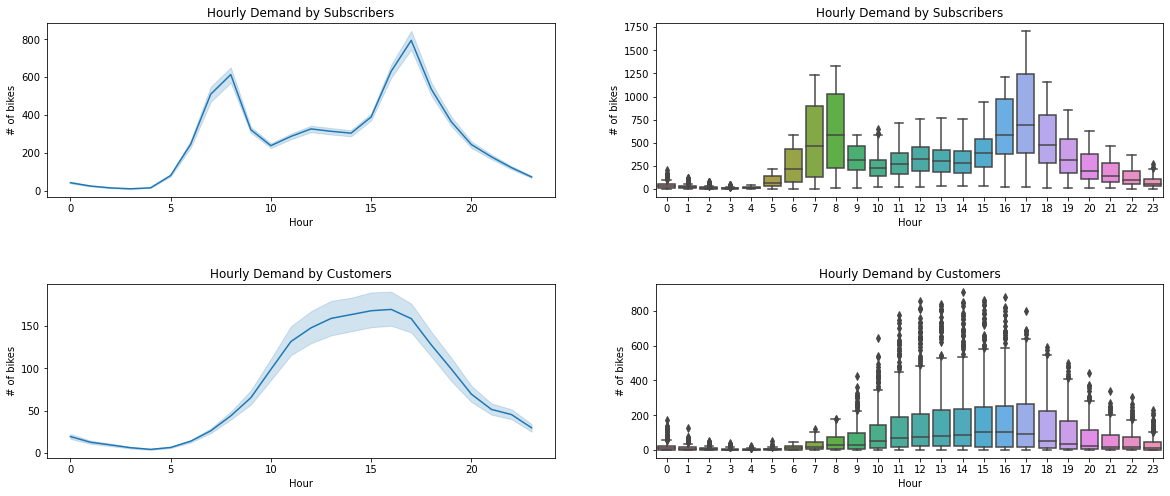

In [16]:
# calculation of daily demand by usertype
bike_hourly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_subscriber = pd.DataFrame(bike_hourly_demand_subscriber)

bike_hourly_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_customer = pd.DataFrame(bike_hourly_demand_customer)


# plot the daily demand by Subscriber and Customer
fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Hour', ylabel='# of bikes')
ax[0,1].set(xlabel='Hour', ylabel='# of bikes')
ax[1,0].set(xlabel='Hour', ylabel='# of bikes')
ax[1,1].set(xlabel='Hour', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Hourly Demand by Subscribers')
ax[0,1].set_title('Hourly Demand by Subscribers')
ax[1,0].set_title('Hourly Demand by Customers')
ax[1,1].set_title('Hourly Demand by Customers')

plt.show()

#### Results:

- higher demand by subscribers than customers(peak of subscripers with 800 trips versus peak of customers with 150 trips)

- The subscriber demand has two peaks, one in the morning (9 am) and one in the afternoon (5 pm) 
- between these two peaks the demand describes much more in constrast to the total number of hourly demand (see plot above)
- it can be concluded that this subscription is used mostly by people for everyday trips to and from work

- The customer demand increases in the late morning (10 am) and stays at a high utilisation level till the late afternoon 
- here it can be concluded that this subscription type is used more for trips during the day or freetime what probably also depends on the utilisation by tourists

### Weekly demand depending on the usertype:

In [7]:
# calculation of weekly demand by usertype
bike_daily_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_subscriber = pd.DataFrame(bike_daily_demand_subscriber)

bike_daily_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_customer = pd.DataFrame(bike_daily_demand_customer)


#plot the daily demand by Subscriber and Customer
fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[0,1].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,1].set(xlabel='Weekday', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Daily Demand by Subscribers')
ax[0,1].set_title('Daily Demand by Subscribers')
ax[1,0].set_title('Daily Demand by Customers')
ax[1,1].set_title('Daily Demand by Customers')

plt.show()

NameError: name 'bike_df' is not defined

#### Results:

- 

### Monthly demand by usertype:

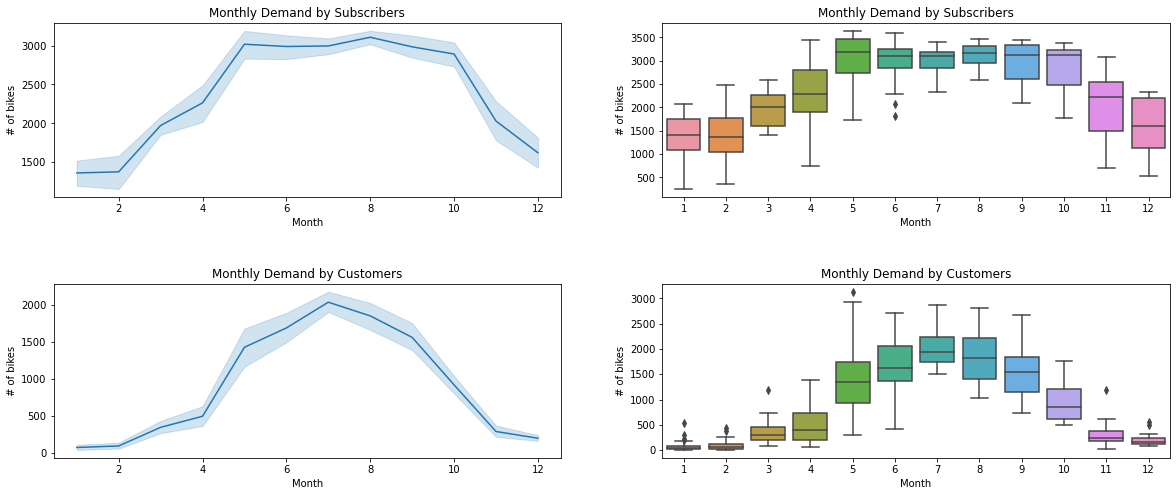

In [18]:
# calculation of monthly demand by usertype
bike_monthly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthly_demand_subscriber = pd.DataFrame(bike_monthly_demand_subscriber)

bike_monthy_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthy_demand_customer = pd.DataFrame(bike_monthy_demand_customer)


# #plot the monthly demand by Subscriber and Customer
fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Month', ylabel='# of bikes')
ax[0,1].set(xlabel='Month', ylabel='# of bikes')
ax[1,0].set(xlabel='Month', ylabel='# of bikes')
ax[1,1].set(xlabel='Month', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Monthly Demand by Subscribers')
ax[0,1].set_title('Monthly Demand by Subscribers')
ax[1,0].set_title('Monthly Demand by Customers')
ax[1,1].set_title('Monthly Demand by Customers')

plt.show()

#### Results:

- The subscriber demand ist nearly constant from spring to autumn
- That verfies the assumption that this subscription type is used more by people who use the bikes for recurring ways (like daily work way)

- The customer demand is more concentrated on the warmer months in contrast to the demand by subscribers
- the customer demand has its peak in the summer
- From this it can be conducted that this subscription type is used more for freetime or touristic trips (as also conducted above)

plot with temperature to show correlation? 